In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
df = pd.read_csv('wind_power_data_merged.csv')

In [ ]:
df.head()

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,2019-01-01 01:00:00,10.926,33.6881,0.979103,9.014
1,2019-01-01 02:00:00,9.919,37.2619,0.979566,9.428
2,2019-01-01 03:00:00,8.567,30.5029,0.979937,8.700
3,2019-01-01 04:00:00,7.877,28.4192,0.980053,8.481
4,2019-01-01 05:00:00,7.259,27.3703,0.979867,8.383


In [ ]:
df.columns = ['DateTime',	'Air temperature | (°C)','Power generated by system | (MW)','Pressure | (atm)',	'Wind speed | (m/s)']
df.head()

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,2019-01-01 01:00:00,10.926,33.6881,0.979103,9.014
1,2019-01-01 02:00:00,9.919,37.2619,0.979566,9.428
2,2019-01-01 03:00:00,8.567,30.5029,0.979937,8.700
3,2019-01-01 04:00:00,7.877,28.4192,0.980053,8.481
4,2019-01-01 05:00:00,7.259,27.3703,0.979867,8.383


In [ ]:
df.shape

(43823, 5)

<Axes: >

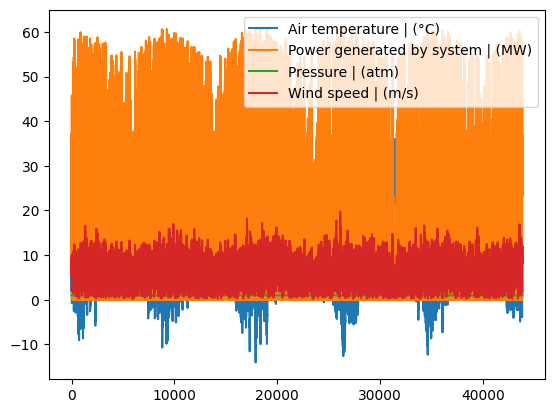

In [ ]:
df.plot()

In [ ]:
def adfuller_test(df):
  result = adfuller(df)
  labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']

  for value, label in zip(result, labels):
    print('{} : {}'.format(label, value))

    if result[1]<=0.05:
      print('Reject the null hypothesis and data is stationary')
    else:
      print('Aceept the null hypothesis and data is not stationary')

In [ ]:
adfuller_test(df['Wind speed | (m/s)'])

ADF test statistics : -21.83670930514568
Reject the null hypothesis and data is stationary
p-value : 0.0
Reject the null hypothesis and data is stationary
Lags used : 50
Reject the null hypothesis and data is stationary
Number of obs used : 43772
Reject the null hypothesis and data is stationary


In [ ]:
adfuller_test(df['Power generated by system | (MW)'])

ADF test statistics : -21.21153899144536
Reject the null hypothesis and data is stationary
p-value : 0.0
Reject the null hypothesis and data is stationary
Lags used : 50
Reject the null hypothesis and data is stationary
Number of obs used : 43772
Reject the null hypothesis and data is stationary


<Axes: >

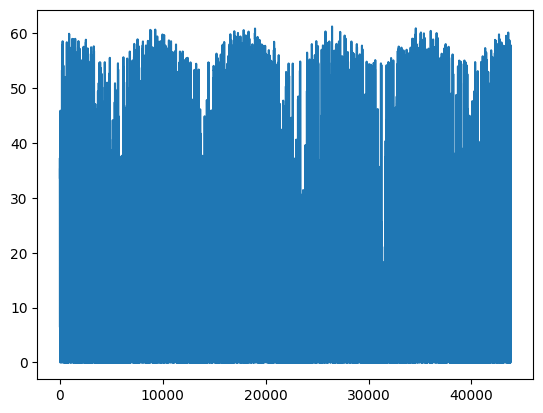

In [ ]:
df['Power generated by system | (MW)'].plot()

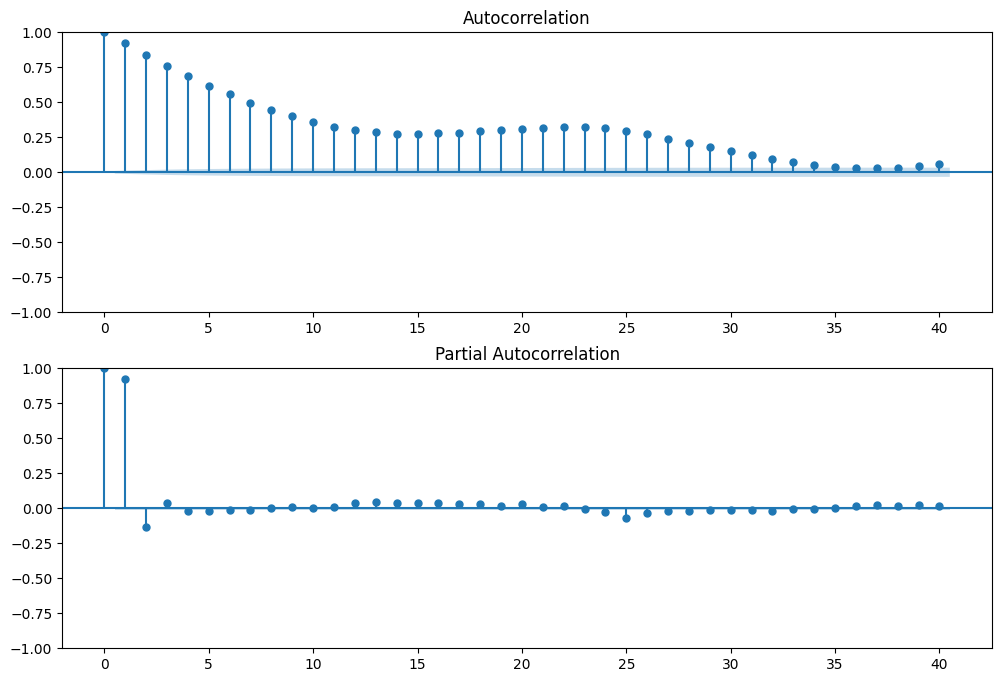

In [ ]:
fig=plt.figure(figsize= (12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Power generated by system | (MW)'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['Power generated by system | (MW)'].iloc[13:],lags=40,ax=ax2)

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Power generated by system | (MW)'],order=(1,0,0),seasonal_order=(0,0,0,24))

In [ ]:
results = model.fit()

In [ ]:
df['forecast_SARIMAX'] = results.predict(start=1,end=46006,dynamic=True)

In [ ]:
df.tail(20)

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s),forecast_SARIMAX
43803,2023-12-31 04:00:00,6.791,45.5821,0.982362,10.103,5.434722e-323
43804,2023-12-31 05:00:00,7.561,37.4079,0.981529,9.380,5.434722e-323
43805,2023-12-31 06:00:00,7.482,37.1456,0.981186,9.361,5.434722e-323
43806,2023-12-31 07:00:00,7.257,57.8251,0.981238,11.945,5.434722e-323
43807,2023-12-31 08:00:00,9.628,56.3085,0.981104,11.511,5.434722e-323
43808,2023-12-31 09:00:00,9.419,30.4861,0.981065,8.815,5.434722e-323
43809,2023-12-31 10:00:00,8.478,26.9840,0.981070,8.424,5.434722e-323
43810,2023-12-31 11:00:00,8.526,46.9312,0.981215,10.332,5.434722e-323
43811,2023-12-31 12:00:00,8.712,52.6427,0.981380,10.890,5.434722e-323
43812,2023-12-31 13:00:00,9.446,35.2871,0.981847,9.163,5.434722e-323


<Axes: >

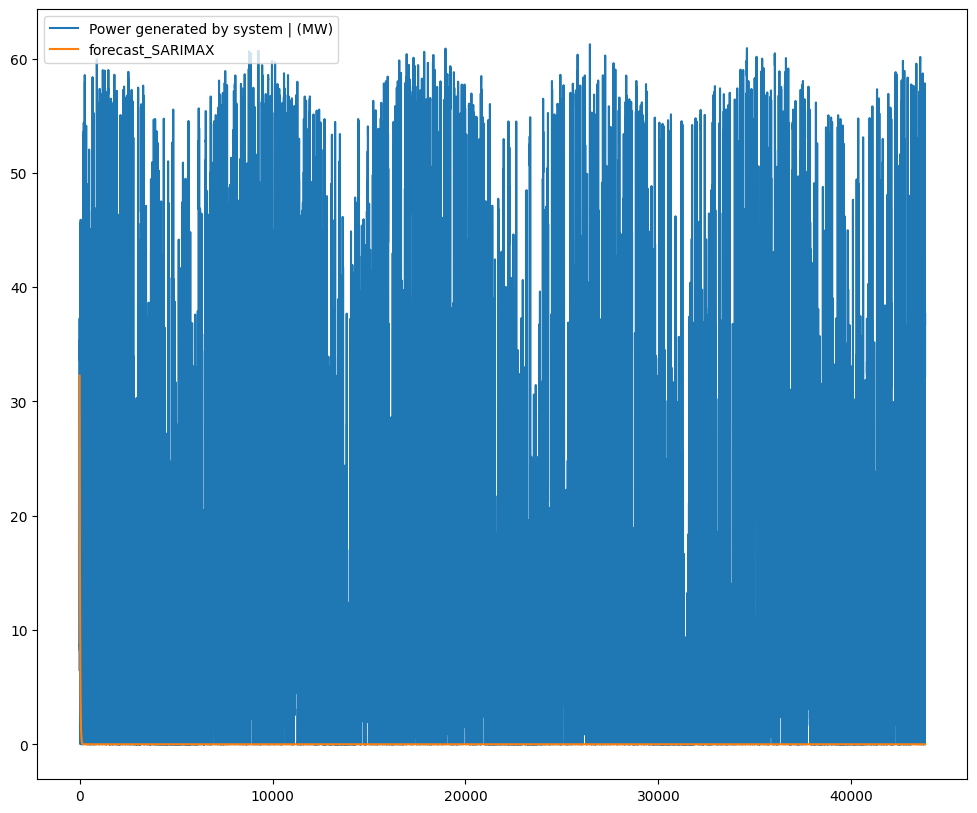

In [ ]:
df[['Power generated by system | (MW)','forecast_SARIMAX']].plot(figsize=(12,10))

In [ ]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Load the DataFrame and parse the DateTime column as datetime
df = pd.read_csv('wind_power_data_merged.csv')

# Let pandas infer the datetime format automatically
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Sort DataFrame by DateTime (if not already sorted)
df.sort_values(by='DateTime', inplace=True)

# Calculate future dates using DateOffset (e.g., incrementing by hours)
future_dates = [df['DateTime'].iloc[-1] + DateOffset(hours=x) for x in range(1, 25)]  # Generate 24 future dates (1 to 24 hours ahead)

# Create a DataFrame with future dates as index and placeholder columns
future_dataset = pd.DataFrame(index=future_dates, columns=df.columns)

# Concatenate the original DataFrame with the future dataset
future_df = pd.concat([df, future_dataset])

# Display the shape of the concatenated DataFrame
print(future_df.shape)

(43847, 5)


In [ ]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns = df.columns)

In [ ]:
future_dataset.tail()

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
2024-01-01 19:00:00,NaN,NaN,NaN,NaN,NaN
2024-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN
2024-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN
2024-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN
2024-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df = pd.concat([df,future_dataset])

In [ ]:
future_df.shape

(43846, 5)

In [ ]:
future_df['forecast_SARIMAX']= results.predict(start=43824,end=46006,dynamic=True)

<Axes: >

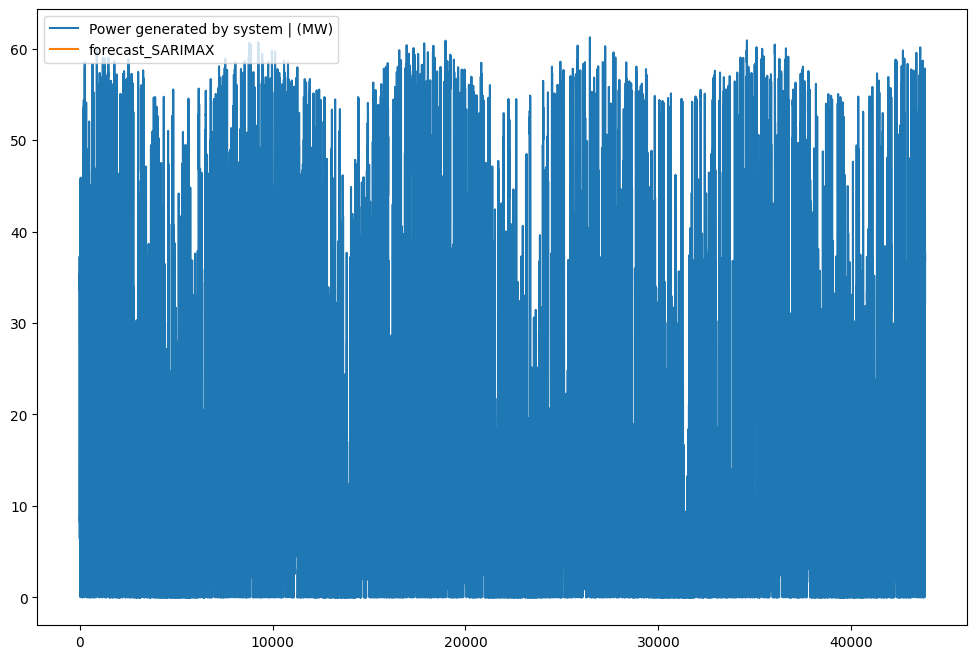

In [ ]:
future_df[['Power generated by system | (MW)','forecast_SARIMAX']].plot(figsize=(12,8))

In [ ]:
import pandas as pd

# Load the DataFrame and parse the DateTime column as datetime
df = pd.read_csv('wind_power_data_merged.csv', parse_dates=['DateTime'])

# Display data types to confirm datetime parsing
print(df.dtypes)


DateTime                            datetime64[ns]
Air temperature | (°C)                     float64
Power generated by system | (MW)           float64
Pressure | (atm)                           float64
Wind speed | (m/s)                         float64
dtype: object


In [ ]:
# Set DateTime column as the DataFrame index
df.set_index('DateTime', inplace=True)

In [ ]:
# Display forecasted values in table format
print(future_df[['DateTime', 'forecast_SARIMAX']].tail(20))

                    DateTime  forecast_SARIMAX
2024-01-01 04:00:00      NaT               NaN
2024-01-01 05:00:00      NaT               NaN
2024-01-01 06:00:00      NaT               NaN
2024-01-01 07:00:00      NaT               NaN
2024-01-01 08:00:00      NaT               NaN
2024-01-01 09:00:00      NaT               NaN
2024-01-01 10:00:00      NaT               NaN
2024-01-01 11:00:00      NaT               NaN
2024-01-01 12:00:00      NaT               NaN
2024-01-01 13:00:00      NaT               NaN
2024-01-01 14:00:00      NaT               NaN
2024-01-01 15:00:00      NaT               NaN
2024-01-01 16:00:00      NaT               NaN
2024-01-01 17:00:00      NaT               NaN
2024-01-01 18:00:00      NaT               NaN
2024-01-01 19:00:00      NaT               NaN
2024-01-01 20:00:00      NaT               NaN
2024-01-01 21:00:00      NaT               NaN
2024-01-01 22:00:00      NaT               NaN
2024-01-01 23:00:00      NaT               NaN


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate forecasted values using SARIMA model
forecast_start = df.index[-1] + pd.DateOffset(hours=1)  # Start forecasting from the next hour
forecast_end = forecast_start + pd.DateOffset(hours=23)  # Forecast for the next 24 hours
forecast = results.predict(start=43824,end=46006, dynamic=True)

# Actual values (ground truth) for the next 24 hours
actual_values = df.loc[forecast_start:forecast_end, 'Power generated by system | (MW)']

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} MW")
print(f"Mean Squared Error (MSE): {mse:.2f} MW^2")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} MW")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate forecasted values using SARIMA model
forecast_start = df.index[-1] + pd.DateOffset(hours=1)  # Start forecasting from the next hour
forecast_end = forecast_start + pd.DateOffset(hours=23)  # Forecast for the next 24 hours
forecast = results.predict(start=43824,end=46006, dynamic=True)

# Actual values (ground truth)
actual_values = df['Power generated by system | (MW)'].loc[43824:46006]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} MW")
print(f"Mean Squared Error (MSE): {mse:.2f} MW^2")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} MW")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
